## Unit 27.2 Ultimate Technologies Inc. Take-Home Challenge

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

# Part I - EDA

## Load Data

In [2]:
df_logins = pd.read_json('logins.json')

In [3]:
df_logins.head().T

,0,1,2,3,4
login_time,1970-01-01 20:13:18,1970-01-01 20:16:10,1970-01-01 20:16:37,1970-01-01 20:16:36,1970-01-01 20:26:21


In [4]:
df_logins.shape

(93142, 1)

In [5]:
df_logins.loc[0:2]

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [6]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df_logins.columns

Index(['login_time'], dtype='object')

In [8]:
df_logins.index

RangeIndex(start=0, stop=93142, step=1)

## Part 1 - Exploratory Data Analysis

### Aggregate login counts on 15-minute intervals

In [9]:
df_logins.set_index('login_time', inplace=True)

In [10]:
df_logins.sort_index(ascending=True, inplace=True)

In [11]:
df_logins['counts'] = 1

In [12]:
df_logins.head(2)

,counts
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1


In [13]:
df_logins.tail(2)

,counts
login_time,
1970-04-13 18:54:23,1
1970-04-13 18:57:38,1


So, we're looking at a time series for period Jan 1, 1970 through April 13, 1970

In [14]:
login_15min= df_logins.resample('15min').sum()

In [15]:
login_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


### Visualize and describe the resulted time series of login counts

In [16]:
login_15min.describe()

,counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [17]:
login_8hr= df_logins.resample('480min').sum()

In [18]:
login_days= df_logins.resample('D').sum()

In [19]:
login_days.head()

,counts
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


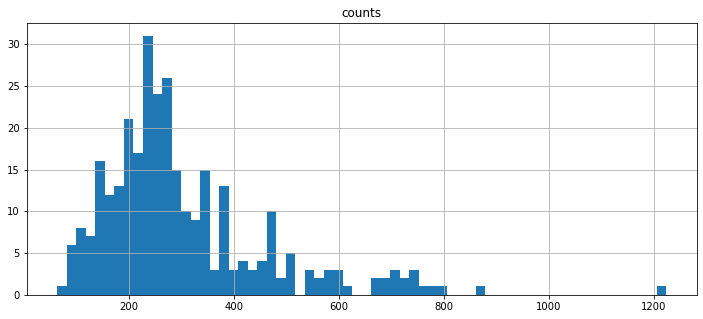

In [20]:
_ = login_8hr.hist(bins = 64, figsize = (12,5))

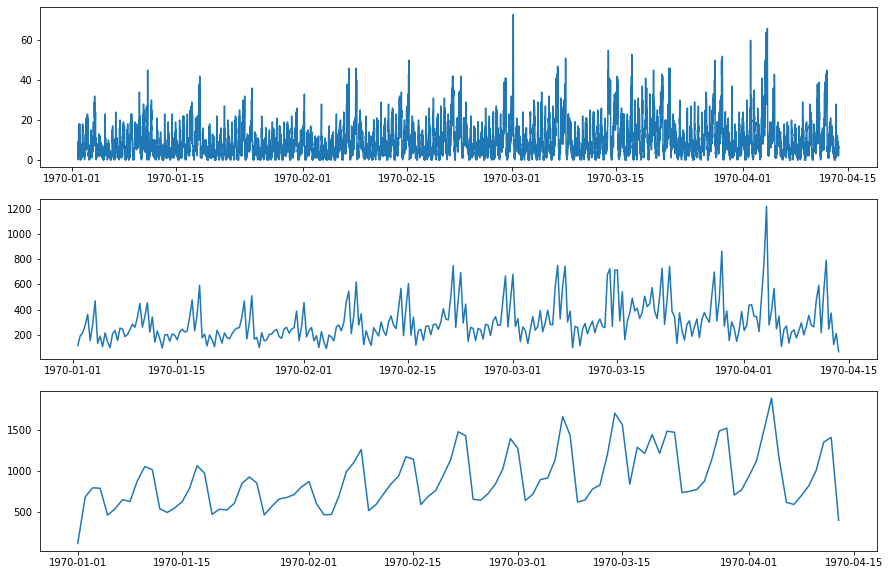

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,10))
ax1.plot(login_15min)
ax2.plot(login_8hr)
ax3.plot(login_days);

#### Zooming out from 15 minutes to 8 hour and then 24 hours intervals indicate that there's definitely a pattern in login frequencies when it comes to a day of the week. We can also guess that there's a pattern throughout individual days. We will sample an individual week first and then an individual day to drill down further.

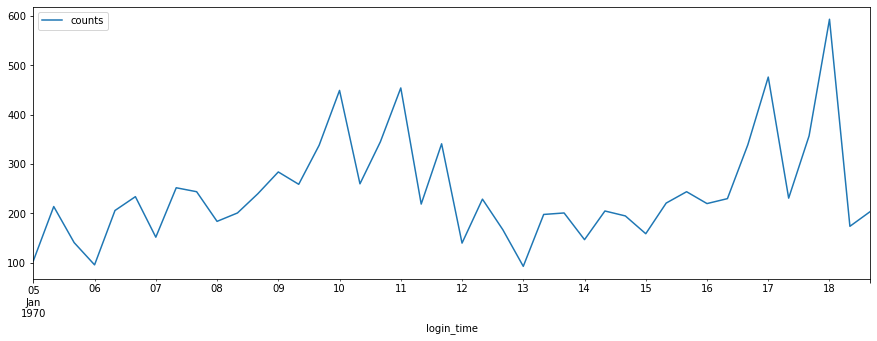

In [22]:
# Let's sample 2 weeks starting Monday Jan 5, 1970 through Sunday Jan 18, 1970 - at 8 hour increments
login_8hr.loc['1970-01-05':'1970-01-18'].rolling(window=1).mean().plot(figsize=(15,5))

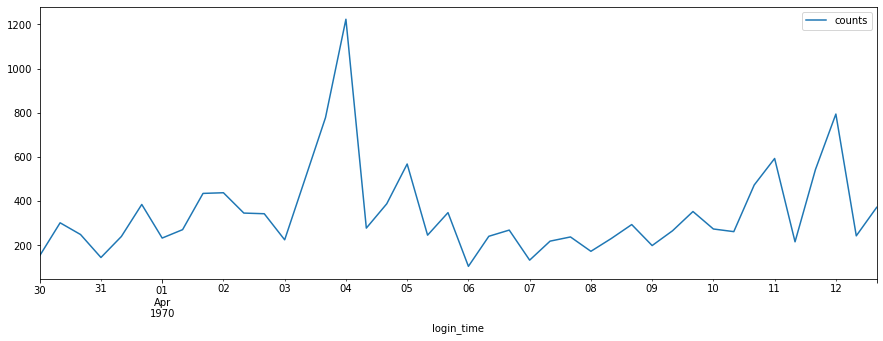

In [23]:
# Let's sample another 2 weeks starting Monday March 30, 1970 through Sunday April 13, 1970 - at 8 hour increments
login_8hr.loc['1970-03-30':'1970-04-12'].rolling(window=1).mean().plot(figsize=(15,5))

#### OK, there's definitely a pattern of logins becoming more frequent starting Friday, peacking through Saturday and dropping sharply on Sunday.

#### Now, let's zoom in at an hourly level - will look at a typical weekday, say Tuesday and a weekend, Sat-Sun

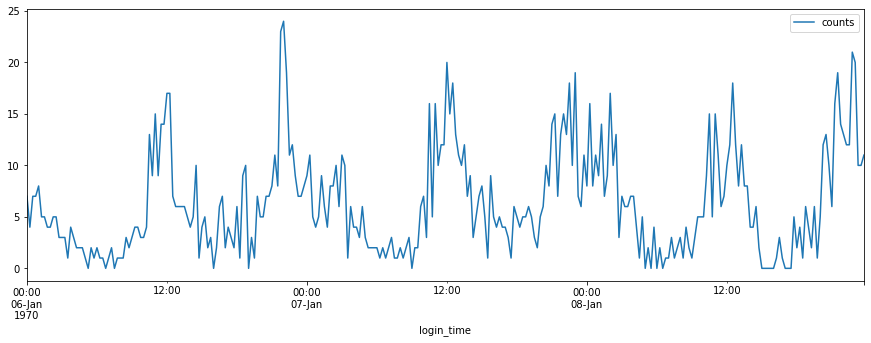

In [24]:
# Weekday Tuesday Jan 6, 1970 through Thursday Jan 8, 1970 - at 15 minute increments
login_15min.loc['1970-01-06':'1970-01-08'].rolling(window=1).mean().plot(figsize=(15,5))

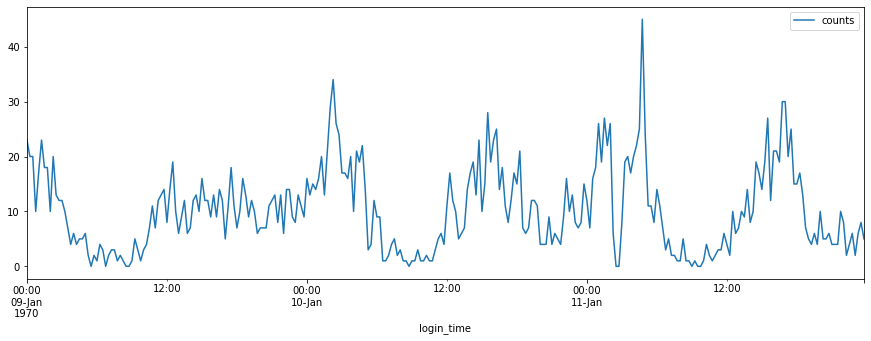

In [25]:
# Weekends Friday Jan 9, 1970 through Sunday Jan 11, 1970 - at 15 minute increments
login_15min.loc['1970-01-09':'1970-01-11'].rolling(window=1).mean().plot(figsize=(15,5))

## Part I - Conclusions

1. A Day of the Week Pattern - demand increases starting Friday night and drops on Sunday night
2. Time of the Day in a Week Day Pattern - demand jumps up on midnights and noons Mon-Fri
3. Time of the Day in a Weekend - same as for regular weekdays, midnights and noons are busiest

# Part II - Experiment and Metrics Design

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

#### Answer:
Assuming the goal of Ultimate company is to maximize profits I suppose that it is done by minimizing idle time of the driver partners' vehicles. Such goal could be achieved through running an experiment, wherein if a driver partner finds themselves in an 'idle mode', they are encouraged to cross the toll bridge to the other city.

The assumption here is when it's the weekends, it is best to hang in Ultimate Metropolis during the day and in Ultimate Gotham during the night.

The measure of success of the experiment could be an improvemnt in the surge numbers in the weekends - the improvment would be calculated as the difference of the surge trends before and after the experiement.

### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
**a. how you will implement the experiment**

**b. what statistical test(s) you will conduct to verify the significance of the
observation**

**c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats**

#### Answers:


a. We would start experiment with the help of a car ride software, which would help us collect useful data - in this case: 1 - partner car's activity, such as time series of geolocation during work hours, 2 - volume and earned revenue per each ride, 3 - tracking visits to the 'foreign' territory.

Before we start remibursing drivers for the bridge tolls, we would have to introduce a simple rule - driver partners would need to identify themselves as 'local' or 'foreigner/out-of-towner' for either of the two cities and stick to that legen throughout the whole experiment.

Ok, now that the ground rules are established, we would start distributing those free bridge passes and track the above metrics via the mobile apps.

b. We would be observing concentration of 'foreigners' in each city during the their respective 'peak' hours and measure for any changes: in Gotham - during weekdays at night and in Metropolis - during weekdays in the day time.

We are looking at this experiment from the business perspective, not the driver partners, or the customers, so the other metrics we would be tracking is whether the 'arrival of the bridge crossing foreigners' translates into more rides, i.e. more transaction volume and revenue.

We would check for correlation between the 'bridge crossing' and 'revenues' earned - increase in one category doesn not automatically mean the growth of the other.

c.If the statistical analysis demonstrates that there's indeed an increase of 'foreign driver arrivals' in either or both the cities, we could conclude that at least we were able to encourage the driver partners to expand availability.

Then, if there's an increase in the sales and it is correlated with the increased car availability, then the bridge fee reimbursement was an effective strategy.

As for the city operations team - should the first part of the measurement fail to support the hypothesis that the free passes lead to higher frequency of bridge crossing, in one or both of the cities, then before deciding to cancel free passes, we need to first check correlation with sales.

If there is a direct sales increase with ANY foreign driver crossing, then the bridge passes shall stay. However, if there's no sales increase, while the drivers are happily keep crossing the bridge back and forth, then it is time to remind the city that we live in capitalism and revoke the program.

# Part III - Predictive Modeling

### Context:
Ultimate conducted an experiment for several months, measuring user retention metrics. The company wants to understand what factors drive the user retention and make predictions, using the datasets collected during the experiment.

### Tasks and Questions:

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## Load Data

In [26]:
df = pd.read_json('ultimate_data_challenge.json')

In [27]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


## EDA

Let's determine the period which the data covers.

In [28]:
print('The sign-up dates are in the period:')
print(df['signup_date'].min())
print(df['signup_date'].max())

print('\nThe last trip dates are in the period:')
print(df['last_trip_date'].min())
print(df['last_trip_date'].max())

The sign-up dates are in the period:
2014-01-01
2014-01-31

The last trip dates are in the period:
2014-01-01
2014-07-01


So, there's 6 months of data.

Now, convert the 'signup_date' and 'last_trip_date' into pd date formats:

In [29]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [30]:
print('The sign-up dates are in the period: \n')
print(df['signup_date'].min())
print(df['signup_date'].max())

print('\nThe last trip dates are in the period:')
print(df['last_trip_date'].min())
print(df['last_trip_date'].max())

The sign-up dates are in the period: 

2014-01-01 00:00:00
2014-01-31 00:00:00

The last trip dates are in the period:
2014-01-01 00:00:00
2014-07-01 00:00:00


#### Let's find the answer to this question: What fraction of the observed users were retained?

In [31]:
# make a user status list - throughout June 2014; active == 1, inactive == 0
user_status = (df['last_trip_date'] > df['last_trip_date'].max() - pd.Timedelta('30 days')).astype('int')

In [32]:
user_status

0        1
1        0
2        0
3        1
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: last_trip_date, Length: 50000, dtype: int32

In [33]:
# calculate fraction of active users
print(f'A total count of all users is {user_status.count()}\n')
print(f'A count of active users is {user_status.sum()}\n')
print(f'The fraction of of retained (active) users is {100*user_status.sum()/user_status.count()}%\n')

A total count of all users is 50000

A count of active users is 18310

The fraction of of retained (active) users is 36.62%



#### Make a dataframe with useful data fields:

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [35]:
# pick only data fields that are potentially useful for feature extraction:
df_users = df.iloc[:, np.r_[0, 6, 8, 7, 9, 4, 10, 1, 3]]

In [36]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   phone                   49604 non-null  object 
 2   ultimate_black_user     50000 non-null  bool   
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_surge               50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   trips_in_first_30_days  50000 non-null  int64  
 8   avg_rating_of_driver    41878 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [37]:
df_users['user_status']=user_status

<ipython-input-37-01c5570f6452>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['user_status']=user_status


In [38]:
df_users.head(2)

,city,phone,ultimate_black_user,surge_pct,weekday_pct,avg_surge,avg_dist,trips_in_first_30_days,avg_rating_of_driver,user_status
0,King's Landing,iPhone,True,15.4,46.2,1.1,3.67,4,4.7,1
1,Astapor,Android,False,0.0,50.0,1.0,8.26,0,5.0,0


### Data Visualization

#### Distribution of active and inactive users

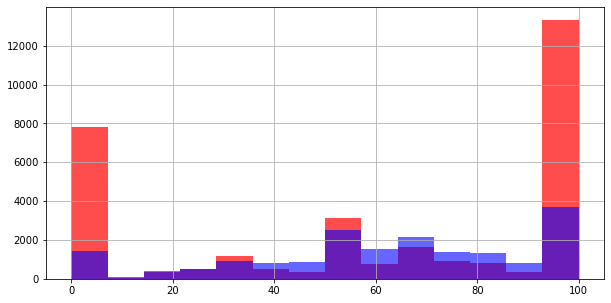

In [39]:
fig = plt.figure(figsize=(10,5))
df_users[df_users.user_status==0]['weekday_pct'].hist(bins=14, color='Red', alpha=0.7)
df_users[df_users.user_status==1]['weekday_pct'].hist(bins=14, color='Blue', alpha=0.6)

Inactive users = 'Blue', Active users = 'Red'

### Feature Engineering

In [40]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   phone                   49604 non-null  object 
 2   ultimate_black_user     50000 non-null  bool   
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_surge               50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   trips_in_first_30_days  50000 non-null  int64  
 8   avg_rating_of_driver    41878 non-null  float64
 9   user_status             50000 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(1), object(2)
memory usage: 3.3+ MB


In [41]:
# get categorical features from the df_users
df_objects = df_users.select_dtypes(include=['object'])
df_objects.head(2)

,city,phone
0,King's Landing,iPhone
1,Astapor,Android


In [42]:
# drop categorical feature columns from the df_users
df_users = pd.DataFrame(df_users.drop(df_objects.columns, axis=1))

In [43]:
# create dummy features/indicator variables from the categorical features
df_dummies = pd.get_dummies(df_objects)

In [44]:
df_dummies.head(2)

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0,1,0,0,1
1,1,0,0,1,0


In [45]:
# add the dummy features back to the df_users:
df_users = df_users.merge(df_dummies,left_index=True, right_index=True)

In [46]:
df_users.head().T

,0,1,2,3,4
ultimate_black_user,True,False,False,True,False
surge_pct,15.4,0,0,20,11.8
weekday_pct,46.2,50,100,80,82.4
avg_surge,1.1,1,1,1.14,1.19
avg_dist,3.67,8.26,0.77,2.36,3.13
trips_in_first_30_days,4,0,3,9,14
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
user_status,1,0,0,1,0
city_Astapor,0,1,1,0,0
city_King's Landing,1,0,0,1,0


In [47]:
print(df_users.isnull().sum())

ultimate_black_user          0
surge_pct                    0
weekday_pct                  0
avg_surge                    0
avg_dist                     0
trips_in_first_30_days       0
avg_rating_of_driver      8122
user_status                  0
city_Astapor                 0
city_King's Landing          0
city_Winterfell              0
phone_Android                0
phone_iPhone                 0
dtype: int64


8,122 avg_rating_of_drive values are missing, so we need to impute the missing data before getting to the modeling.

In [48]:
df_users.avg_rating_of_driver = df_users.avg_rating_of_driver.fillna(df_users.avg_rating_of_driver.mean())

In [49]:
print(df_users.isnull().sum())

ultimate_black_user       0
surge_pct                 0
weekday_pct               0
avg_surge                 0
avg_dist                  0
trips_in_first_30_days    0
avg_rating_of_driver      0
user_status               0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
dtype: int64


#### Correlation of features with user retention

In [50]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ultimate_black_user     50000 non-null  bool   
 1   surge_pct               50000 non-null  float64
 2   weekday_pct             50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   avg_dist                50000 non-null  float64
 5   trips_in_first_30_days  50000 non-null  int64  
 6   avg_rating_of_driver    50000 non-null  float64
 7   user_status             50000 non-null  int32  
 8   city_Astapor            50000 non-null  uint8  
 9   city_King's Landing     50000 non-null  uint8  
 10  city_Winterfell         50000 non-null  uint8  
 11  phone_Android           50000 non-null  uint8  
 12  phone_iPhone            50000 non-null  uint8  
dtypes: bool(1), float64(5), int32(1), int64(1), uint8(5)
memory usage: 2.8 MB


In [51]:
# bring user retention as the first item for the correlation matrix
# make 3 matrices: 1 - all features, 2 - numerical, 3 - categorical
df_corr = df_users.iloc[:, np.r_[7, 1:7, 8:13]]
df_corr_numerical = df_users.iloc[:, np.r_[7, 1:7]]
df_corr_categorical = df_users.iloc[:, np.r_[7, 0, 8:13]]

corr_mtrx = df_corr.corr()
corr_mtrx_1 = df_corr_numerical.corr()
corr_mtrx_2 = df_corr_categorical.corr()

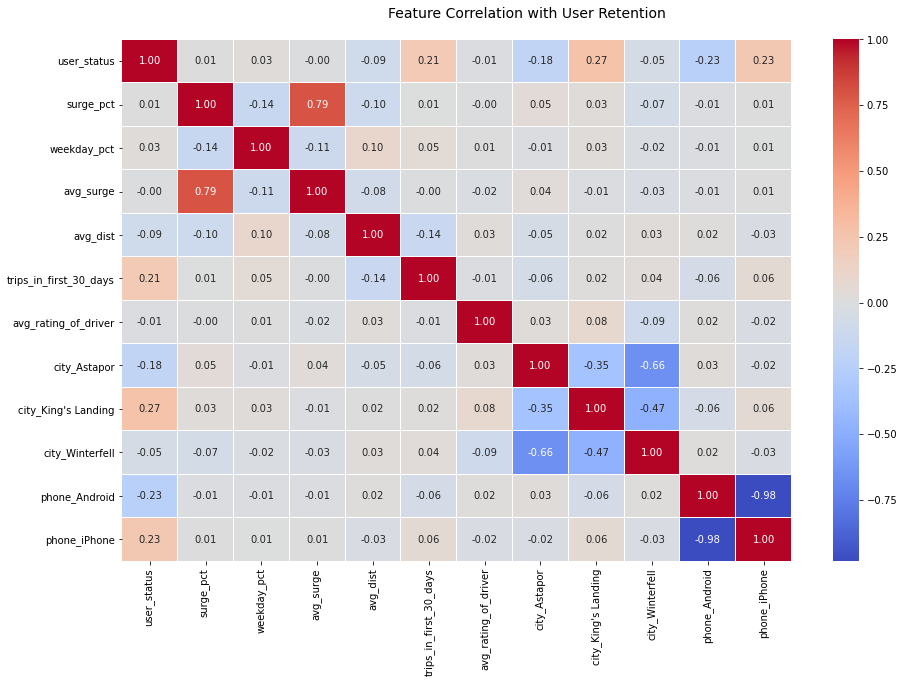

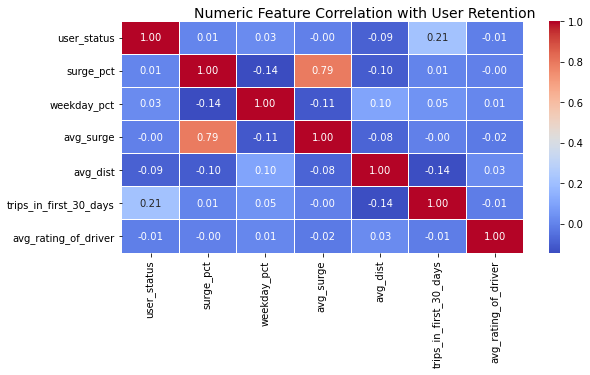

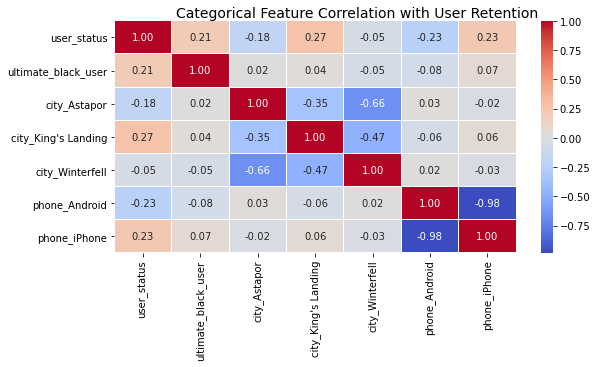

In [52]:
# Plot all feature correlation
fig, ax = plt.subplots(figsize=(15,9))
hmap = sns.heatmap(corr_mtrx, annot=True, ax=ax, cmap='coolwarm',
                  fmt='.2f', linewidth=.05)
fig.subplots_adjust(top=0.93)
title = fig.suptitle('Feature Correlation with User Retention', fontsize=14)

# Plot numeric feature correlation
fig1, ax = plt.subplots(figsize=(9,4))
hmap = sns.heatmap(corr_mtrx_1, annot=True, ax=ax, cmap='coolwarm',
                  fmt='.2f', linewidth=.05)
fig1.subplots_adjust(top=0.93)
title = fig1.suptitle('Numeric Feature Correlation with User Retention', fontsize=14)

# Plot categorical feature correlation
fig2, ax = plt.subplots(figsize=(9,4))
hmap = sns.heatmap(corr_mtrx_2, annot=True, ax=ax, cmap='coolwarm',
                  fmt='.2f', linewidth=.05)
fig2.subplots_adjust(top=0.93)
title = fig2.suptitle('Categorical Feature Correlation with User Retention', fontsize=14)

#### Correlations
It is clear that the following features are most correlated to user retention:

- Trips in the first 30 days
- Whether a user:
    - is an Ultimate Black User
    - is from King's Landing
    - uses an iPhone

In [53]:
corr_mtrx['user_status'].sort_values(ascending=False)

user_status               1.000000
city_King's Landing       0.268272
phone_iPhone              0.231391
trips_in_first_30_days    0.214728
weekday_pct               0.026413
surge_pct                 0.010612
avg_surge                -0.003567
avg_rating_of_driver     -0.010082
city_Winterfell          -0.046985
avg_dist                 -0.090279
city_Astapor             -0.179373
phone_Android            -0.231731
Name: user_status, dtype: float64

## Model

In [54]:
# Imports
# import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

**<font color='teal'>Create matricies X for explanatory variables and Y for dependent variable</font>**

In [55]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ultimate_black_user     50000 non-null  bool   
 1   surge_pct               50000 non-null  float64
 2   weekday_pct             50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   avg_dist                50000 non-null  float64
 5   trips_in_first_30_days  50000 non-null  int64  
 6   avg_rating_of_driver    50000 non-null  float64
 7   user_status             50000 non-null  int32  
 8   city_Astapor            50000 non-null  uint8  
 9   city_King's Landing     50000 non-null  uint8  
 10  city_Winterfell         50000 non-null  uint8  
 11  phone_Android           50000 non-null  uint8  
 12  phone_iPhone            50000 non-null  uint8  
dtypes: bool(1), float64(5), int32(1), int64(1), uint8(5)
memory usage: 2.8 MB


In [56]:
# Create X matrix:
X = df_users.iloc[:, np.r_[0:7, 8:12]]

In [57]:
X.head().T

,0,1,2,3,4
ultimate_black_user,True,False,False,True,False
surge_pct,15.4,0,0,20,11.8
weekday_pct,46.2,50,100,80,82.4
avg_surge,1.1,1,1,1.14,1.19
avg_dist,3.67,8.26,0.77,2.36,3.13
trips_in_first_30_days,4,0,3,9,14
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
city_Astapor,0,1,1,0,0
city_King's Landing,1,0,0,1,0
city_Winterfell,0,0,0,0,1


In [58]:
# Create y matrix:
y = df_users.user_status
y.head(2)

0    1
1    0
Name: user_status, dtype: int32

In [59]:
df_users.isna().sum()

ultimate_black_user       0
surge_pct                 0
weekday_pct               0
avg_surge                 0
avg_dist                  0
trips_in_first_30_days    0
avg_rating_of_driver      0
user_status               0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
dtype: int64

**<font color='teal'>Apply standard scaler to the X matrix</font>***

In [60]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

**<font color='teal'>Split X_scaled and y into 75/25 Training and Test data subsets</font>**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 11), (12500, 11), (37500,), (12500,))

**<font color='teal'>Test 6 learning rates in the gradient boosting classifier</font>**

In [95]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for a_learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=a_learning_rate,
                                   max_features=2, max_depth=2, random_state=0)
    gb.fit(X_train, y_train)
    print('Learning Rate: ', a_learning_rate)
    print('Accuracy score (training): {0:.3f}'.format(gb.score(X_train, y_train)))
    print('Accuracy score (validation): {0:.3f}'.format(gb.score(X_test, y_test)))
    print('')

Learning Rate:  0.05
Accuracy score (training): 0.703
Accuracy score (validation): 0.698

Learning Rate:  0.1
Accuracy score (training): 0.738
Accuracy score (validation): 0.733

Learning Rate:  0.25
Accuracy score (training): 0.766
Accuracy score (validation): 0.759

Learning Rate:  0.5
Accuracy score (training): 0.775
Accuracy score (validation): 0.770

Learning Rate:  0.75
Accuracy score (training): 0.778
Accuracy score (validation): 0.775

Learning Rate:  1
Accuracy score (training): 0.780
Accuracy score (validation): 0.774



**<font color='teal'>Apply the best learning rate to the model fit and predict on the testing set.</font>**

In [96]:
# assign class labels
class_names = ['Retained', 'Not Retained']

In [105]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75
                               max_features=2, max_depth=2, random_state=0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

SyntaxError: invalid syntax (<ipython-input-105-bf9d7d634478>, line 2)

**<font color='teal'>Print out the confusion matrix and the classification report to review the model performance.</font>**

([<matplotlib.axis.YTick at 0x23d1cfae3d0>,
 [Text(0, 0, 'Retained'), Text(0, 0, 'Not Retained')])

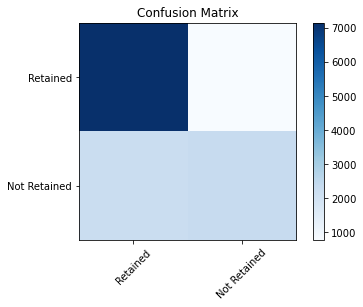

In [106]:
classes = class_names

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

In [107]:
df_cm = pd.DataFrame(data=cm, index=classes, columns=classes)
df_cm.index.name = 'TRUE'
df_cm.columns.name = 'PREDICTION'
df_cm.loc['Total'] = df_cm.sum()
df_cm['Total'] = df_cm.sum(axis=1)

In [108]:
print(df_cm)

PREDICTION    Retained  Not Retained  Total
TRUE                                       
Retained          7150           775   7925
Not Retained      2236          2339   4575
Total             9386          3114  12500


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      7925
           1       0.75      0.51      0.61      4575

    accuracy                           0.76     12500
   macro avg       0.76      0.71      0.72     12500
weighted avg       0.76      0.76      0.75     12500



**<font color='teal'>Calculate the ROC for the model.</font>**

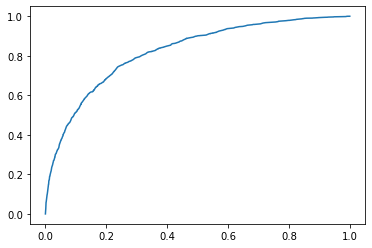

In [110]:
y_pred_prob = gb.predict_proba(X_test)
fpr, tpr, thers = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr, linestyle='-')

In [111]:
pd.DataFrame(gb.feature_importances_, index=X.columns,
             columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_surge,0.201812
weekday_pct,0.158103
city_King's Landing,0.153946
phone_Android,0.122139
ultimate_black_user,0.120690
trips_in_first_30_days,0.093408
city_Astapor,0.065850
surge_pct,0.053005
avg_rating_of_driver,0.013507
avg_dist,0.012025


## Part II - Conclusions

Our Gradient Boosting Classifier resulted in classification accuracy of 77%. The features that have the highest impact on Customer retention are the average surge multiplier over all of user's rips, frequency of user's trips during a weekday, being from King's Landing, and owning an Andriod phone.